## 共通事前処理

In [7]:
# 共通事前処理のうち、Matplotlibに関係あるもの
import matplotlib.pyplot as plt

# numpyも入れておく
import numpy as np

In [8]:
# デフォルトパラメータ設定
# なくても良いが短いコードで見た目をきれいなグラフにするため、デフォルト値の変更をする

# デフォルトフォントサイズ変更
# 都度設定する場合は plt.legend(fontsize=14)など
plt.rcParams['font.size'] = 14

# デフォルトグラフサイズ変更
# 都度設定する場合は plt.figure(figure=(6,6))
plt.rcParams['figure.figsize'] = (6, 6)

# デフォルトで方眼表示ON
# 都度設定する場合はplt.grid()
plt.rcParams['axes.grid'] = True

# pltによる簡易描画

### 散布図

In [9]:
# 散布図
# irisのデータセットを読み込む
import seaborn as sns
df_iris = sns.load_dataset("iris")

# 結果確認
print(df_iris.head())

# 散布図x座標用配列
xs = df_iris['sepal_length'].values

# 散布図y座標用配列
ys = df_iris['sepal_width'].values

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


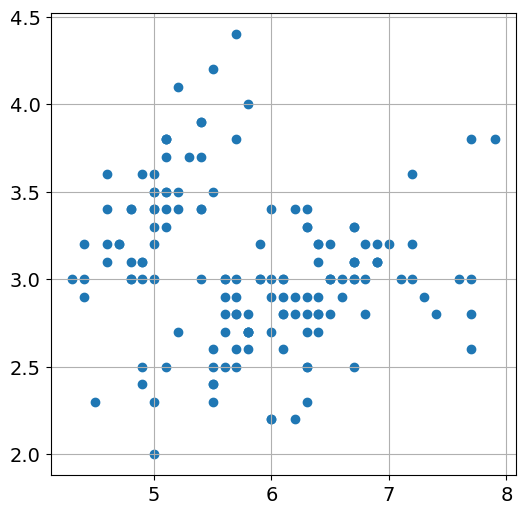

In [10]:
# 散布図
plt.scatter(xs, ys)

# 描画
plt.show()

### 関数グラフ

In [12]:
# データ準備

# シグモイド関数の定義
def sigmoid(x, a):
    return 1/(1 + np.exp(-a*x))

# グラフ描画用x座標リスト
xp = np.linspace(-3, 3, 61)
yp = sigmoid(xp, 1.0)
yp2 = sigmoid(xp, 2.0)

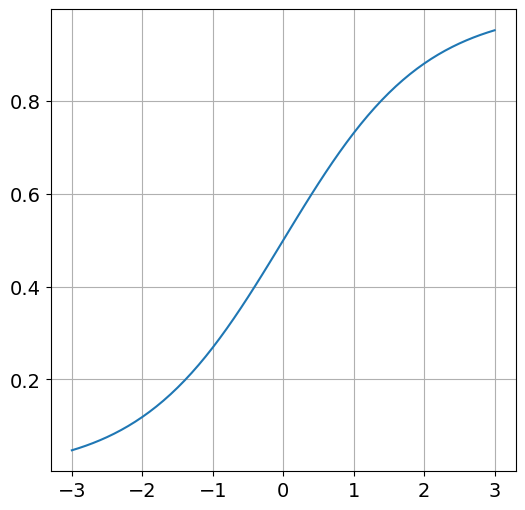

In [15]:
# グラフ描画
plt.plot(xp, yp)

# 描画
plt.show()

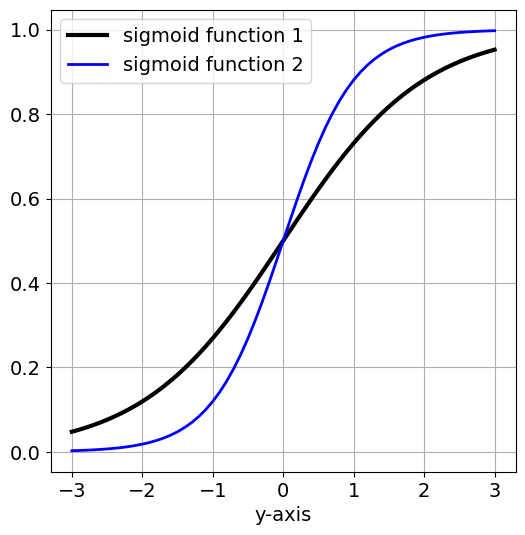

In [18]:
# ラベル付きグラフ描画 #1
# Line width: 3, Color: black
plt.plot(xp, yp, label='sigmoid function 1', lw=3, c='k')

# ラベル付きグラフ描画 #2
# Line width: 2, Color: blue
plt.plot(xp, yp2, label='sigmoid function 2', lw=2, c='b')

# 凡例表示
# plot関数を呼ぶ時にlabelを指定しているので表示できる
plt.legend()

# 軸表示
plt.xlabel('x-axis')
plt.xlabel('y-axis')

# 描画
plt.show()

# subplotを使った複数グラフの同時描画

In [20]:
# データ準備

# 手書き数字データ
# 時間がかかるので注意してください
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# イメージデータ
image = mnist.data
# 正解データ
label = mnist.target

/Users/genta/opt/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


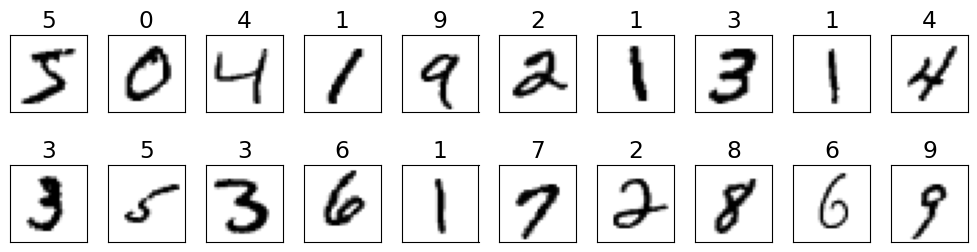

In [25]:
# サイズ指定
# figsize=(width, height)
plt.figure(figsize=(10,3))

# 20個のイメージを表示
# ループはrange関数の範囲指定から、iは0から19の値を取る
for i in range(20):

    # i番目のax変数取得
    # subplotの1から20を指定
    # subplot(縦に分割する数, 横に分割する数, 左上から数えて何個目か領域指定)
    ax = plt.subplot(2, 10, i+1)

    # i番目のイメージデータを取得し、28x28に変換
    img = image[i].reshape(28, 28)

    # imgをイメージ表示
    ax.imshow(img, cmap='gray_r')

    # 正解データをタイトル表示
    ax.set_title(label[i])

    # x、y目盛非表示
    ax.set_xticks([])
    ax.set_yticks([])

# 隣接オブジェクトとぶつからないようにする
plt.tight_layout()

# 表示
plt.show()